## DATA MINING GROUP PROJECT

The Impact of COVID-19: An analysis on the Unemployment and Underemployment Rates of Hong Kong Special Administrative Region (HKSAR)

Group Members: <br>

Ric Russel Marinduque, <br>
Ma. Gracia Corazon Sicat<br>

## Source
Statistics on labour force, unemployment and underemployment: https://data.gov.hk/en-data/dataset/hk-censtatd-tablechart-statistics-on-labour-force-unemployment-and-underemployment

### DATA SET: 
1. Unemployment Rate by Industry 
2. Underemployment Rate by Industry

## METHODOLOGY

1. [Reading and Cleaning the Data](#1) <br>
2. [Understanding the Data](#2) <br>
3. [Data Transformation](#3) <br>
4. [Data and Pattern Analysis](#4) <br>
    a. [What is the MONTH that has the highest unemployment and underemployment rate? (peak month)](#4.1)<br>
    b. [What is the highly affected industry by Covid 19?](#4.2) <br>
5. [Clustering Algorithms](#5) <br>
    a. [K-means Clustering](#5.1)<br>
    b. [Agglomerative Clustering](#5.2) <br>
6. [Findings](#6) <br>


In [54]:
#importing libraries

import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler

import re
from re import search

<a id="1"></a> <br>
### 1. Reading and Cleaning the Data 

In [4]:
#read two data sets and dropping ALL rows and columns with NaN values.

under_df = pd.read_excel('Underemployment Rate by Industry.xls',skiprows=5, skipfooter = 10, header = (0)).dropna(how='all').dropna(axis=1,how="all")

unem_df = pd.read_excel('Unemployment Rate by Previous Industry.xls', skiprows=3, skipfooter = 7, header = (0)).dropna(how='all').dropna(axis=1,how="all")

In [5]:
under_df.head()

,Unnamed: 0,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,All industries
0,2008,1.5,10.6,0.4,1.6,2.1,0.6,1.1,1.4,1.9
1,2009,1.7,12.0,0.6,2.1,2.6,0.9,1.5,1.2,2.3
2,2010,1.5,9.5,0.5,2.0,2.2,1.0,1.4,##,2.0
3,2011,1.3,7.6,0.4,1.7,2.2,0.7,1.2,1.1,1.7
4,2012,1,7.9,0.3,1.5,1.7,0.6,0.9,##,1.5


In [6]:
unem_df.head()

,Unnamed: 0,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,All industries
0,2008,4.5,6.7,2.6,5.0,3.0,2.4,1.3,1.3,3.5
1,2009,6.2,10.0,4.6,7.0,4.8,3.8,2.1,2.2,5.3
2,2010,4.7,6.9,4.1,5.8,3.8,3.4,1.7,1.9,4.3
3,2011,4.0,5.6,3.1,4.6,3.0,2.6,1.5,1.6,3.4
4,2012,4.0,4.9,2.8,4.4,2.7,2.6,1.4,1.2,3.3


In [7]:
#changing Unnamed:0 column to Period

under_df.rename(columns={under_df.columns[0]: 'Period'}, inplace = True)
unem_df.rename(columns={unem_df.columns[0]: 'Period'}, inplace = True)

In [8]:
#changing All Industries column to Mean. All Industries column is the mean of all the industries in this data set.

under_df.rename(columns={under_df.columns[-1]: 'Mean'}, inplace = True)
unem_df.rename(columns={unem_df.columns[-1]: 'Mean'}, inplace = True)

In [9]:
#change all non-numeric values to zero

under_df.replace(["##",'#'], 0, inplace = True)
unem_df.replace(["##",'#'], 0, inplace = True)

In [10]:
under_df.head()

,Period,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,Mean
0,2008,1.5,10.6,0.4,1.6,2.1,0.6,1.1,1.4,1.9
1,2009,1.7,12.0,0.6,2.1,2.6,0.9,1.5,1.2,2.3
2,2010,1.5,9.5,0.5,2.0,2.2,1.0,1.4,0.0,2.0
3,2011,1.3,7.6,0.4,1.7,2.2,0.7,1.2,1.1,1.7
4,2012,1.0,7.9,0.3,1.5,1.7,0.6,0.9,0.0,1.5


In [11]:
unem_df.head()

,Period,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,Mean
0,2008,4.5,6.7,2.6,5.0,3.0,2.4,1.3,1.3,3.5
1,2009,6.2,10.0,4.6,7.0,4.8,3.8,2.1,2.2,5.3
2,2010,4.7,6.9,4.1,5.8,3.8,3.4,1.7,1.9,4.3
3,2011,4.0,5.6,3.1,4.6,3.0,2.6,1.5,1.6,3.4
4,2012,4.0,4.9,2.8,4.4,2.7,2.6,1.4,1.2,3.3


In [12]:
#check if all columns are in float type after changing all non-numeric to zero.

under_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 10 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Period                                                                                163 non-null    object 
 1   Manufacturing                                                                         163 non-null    float64
 2   Construction                                                                          163 non-null    float64
 3   Import/export trade and wholesale                                                     163 non-null    float64
 4   Retail, accommodation and food services                                               163 non-null    float64
 5   Transportation, storage, postal and courier services, information and communications 

In [13]:
unem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 10 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Period                                                                                 163 non-null    object 
 1   Manufacturing                                                                          163 non-null    float64
 2   Construction                                                                           163 non-null    float64
 3   Import/export trade and wholesale                                                      163 non-null    float64
 4   Retail, accommodation and food services                                                163 non-null    float64
 5   Transportation, storage, postal and courier services, information and communic

<a id="2"></a> <br>
### 2. Understanding the Data

In [14]:
under_df.describe()

,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,Mean
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,1.006748,7.492638,0.417178,1.633742,1.876074,0.673006,1.048466,0.458896,1.609202
std,0.641962,2.200184,0.350061,0.936187,0.751610,0.290181,0.398509,1.129008,0.528544
min,0.000000,4.400000,0.000000,0.700000,1.000000,0.300000,0.600000,0.000000,1.000000
25%,0.600000,5.700000,0.300000,1.200000,1.450000,0.500000,0.800000,0.000000,1.300000
50%,0.900000,7.300000,0.300000,1.400000,1.700000,0.600000,1.000000,0.000000,1.500000
75%,1.300000,8.550000,0.500000,1.800000,2.100000,0.750000,1.200000,0.000000,1.800000
max,3.600000,13.400000,2.200000,6.300000,5.600000,2.000000,2.900000,5.200000,3.800000


In [15]:
unem_df.describe()

,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,Mean
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,3.911656,5.753374,3.080368,5.125767,3.098773,2.642945,1.559509,1.158896,3.606748
std,1.139818,2.065151,0.763347,1.386068,0.856708,0.568729,0.419382,1.498960,0.832676
min,2.000000,3.300000,1.900000,3.400000,2.000000,1.900000,1.000000,0.000000,2.600000
25%,3.100000,4.400000,2.600000,4.400000,2.600000,2.200000,1.300000,0.000000,3.100000
50%,3.700000,5.100000,2.900000,4.700000,2.800000,2.500000,1.500000,0.000000,3.400000
75%,4.400000,6.350000,3.250000,5.250000,3.200000,2.800000,1.700000,2.400000,3.600000
max,7.000000,12.800000,5.200000,11.700000,6.000000,4.100000,3.300000,5.200000,6.700000


In [16]:
#understanding more of the data using Pandas Profiling Report

profile_Under = ProfileReport(under_df, title='Summary of Underemployment Data: INDUSTRY', explorative=True)
profile_UnEm = ProfileReport(unem_df, title='Summary of Unemployment Data: INDUSTRY', explorative=True)

In [17]:
#exported the file to HTML

profile_Under.to_file("Underemployment Data_INDUSTRY.html")
profile_UnEm.to_file("Unemployment Data_INDUSTRY.html")

In [18]:
#check if has NaN Values 

unem_df.isna().sum() 

Period                                                                                   0
Manufacturing                                                                            0
Construction                                                                             0
Import/export trade and wholesale                                                        0
Retail, accommodation and food services                                                  0
Transportation, storage, postal and courier services, information and communications     0
Financing, insurance, real estate, professional and business services                    0
Public administration, social and personal services                                      0
Other industries                                                                         0
Mean                                                                                     0
dtype: int64

In [19]:
under_df.isna().sum() 

Period                                                                                  0
Manufacturing                                                                           0
Construction                                                                            0
Import/export trade and wholesale                                                       0
Retail, accommodation and food services                                                 0
Transportation, storage, postal and courier services, information and communications    0
Financing, insurance, real estate, professional and business services                   0
Public administration, social and personal services                                     0
Other industries                                                                        0
Mean                                                                                    0
dtype: int64

<a id="3"></a> <br>
### 3. Data Transformation 

In [20]:
#get monthly data only 

monthly_under_df = under_df.iloc[12:,:]
monthly_unem_df = unem_df.iloc[12:,:]

In [21]:
monthly_under_df.head()

,Period,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,Mean
12,1/2008 - 3/2008,1.3,10.8,0.5,1.6,2.2,0.8,1.1,0.0,1.9
13,2/2008 - 4/2008,2.0,10.3,0.4,1.5,2.0,0.6,1.0,0.0,1.8
14,3/2008 - 5/2008,1.9,10.8,0.4,1.6,1.8,0.8,1.0,0.0,1.8
15,4/2008 - 6/2008,1.8,10.4,0.5,1.5,2.1,0.8,1.0,0.0,1.9
16,5/2008 - 7/2008,1.4,10.9,0.5,1.7,2.1,0.7,1.1,4.8,1.9


In [22]:
monthly_unem_df.head()

,Period,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,Mean
12,1/2008 - 3/2008,3.9,7.5,2.4,4.6,3.0,2.5,1.3,0.0,3.2
13,2/2008 - 4/2008,4.1,8.3,2.5,4.3,3.0,2.5,1.3,0.0,3.3
14,3/2008 - 5/2008,4.5,7.2,2.5,4.8,2.9,2.4,1.4,0.0,3.3
15,4/2008 - 6/2008,4.3,7.6,2.5,4.5,2.7,2.3,1.1,0.0,3.3
16,5/2008 - 7/2008,4.2,6.8,2.2,4.6,2.3,2.3,1.2,0.0,3.4


In [23]:
#get only data from 2019 (Extradition Law Protests) - 2020 (Covid 19 Pandemic)


search_values = ['2020']

underNew_df = monthly_under_df[monthly_under_df.Period.str.contains('|'.join(search_values), case=False)]
unempNew_df = monthly_unem_df[monthly_unem_df.Period.str.contains('|'.join(search_values), case=False)]

In [24]:
# reseting index to zero(0)

unempNew_df.reset_index(drop=True, inplace = True)

In [25]:
underNew_df.reset_index(drop=True, inplace = True)

In [26]:
# change values of Period from 1/2019 to January 2019

month_values = {'1/2': 'January', '2/2': 'February','3/': 'March', '4/': 'April', '5/': 'May', '6/': 'June',
                '7/': 'July', '8/': 'August', '9/': 'September', '10/': 'October', '11/': 'November', '12/': 'December',}

year_values = ['2020']

In [27]:
#create MONTH columns

unempNew_df['Month'] = np.nan
underNew_df['Month'] = np.nan

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [28]:
#loop around the PERIOD column, change the values to year_values and write a value in MONTH column

for key in month_values:
    for row in range(0, len(underNew_df)):
        for i in range(0, len(year_values)):
            if((year_values[i] in underNew_df.iloc[row]['Period'][5:16]) and (key in underNew_df.iloc[row]['Period'][5:16])):
                underNew_df['Month'].iloc[row] = month_values[key] 
                underNew_df['Period'].iloc[row] = year_values[i]

underNew_df

C:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Period,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,Mean,Month
0,2020,0.0,5.7,0.3,1.6,1.1,0.5,0.6,0.0,1.2,January
1,2020,0.0,6.2,0.6,2.5,1.6,0.6,0.8,0.0,1.5,February
2,2020,1.0,7.1,0.9,3.9,2.4,0.8,1.3,0.0,2.1,March
3,2020,1.8,8.0,1.5,5.9,3.6,1.4,2.0,0.0,3.1,April
4,2020,2.3,8.2,1.9,6.3,4.5,1.6,2.4,0.0,3.5,May
5,2020,2.8,8.0,2.1,5.9,5.1,2.0,2.8,0.0,3.7,June
6,2020,3.1,8.0,2.1,5.0,5.2,1.9,2.6,0.0,3.5,July
7,2020,3.6,8.1,2.2,5.9,5.6,2.0,2.9,2.9,3.8,August
8,2020,3.6,8.3,2.2,6.3,5.5,2.0,2.7,2.6,3.8,September


In [29]:
#loop around the PERIOD column, change the values to year_values and write a value in MONTH column

for key in month_values:
    for row in range(0, len(unempNew_df)):
        for i in range(0, len(year_values)):
            if((year_values[i] in unempNew_df.iloc[row]['Period'][5:16]) and (key in unempNew_df.iloc[row]['Period'][5:16])):
                unempNew_df['Month'].iloc[row] = month_values[key] 
                unempNew_df['Period'].iloc[row] = year_values[i]

unempNew_df

C:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Period,Manufacturing,Construction,Import/export trade and wholesale,"Retail, accommodation and food services","Transportation, storage, postal and courier services, information and communications","Financing, insurance, real estate, professional and business services","Public administration, social and personal services",Other industries,Mean,Month
0,2020,3.5,5.7,2.7,5.2,2.5,2.1,1.1,2.9,3.1,January
1,2020,4.0,6.8,2.9,6.1,2.7,2.2,1.3,3.3,3.4,February
2,2020,5.8,8.5,3.6,6.8,3.3,2.8,2.0,3.9,4.2,March
3,2020,6.2,10.0,4.2,9.0,4.7,3.7,2.8,4.7,5.2,April
4,2020,7.0,10.8,4.7,10.6,5.8,4.0,3.3,3.8,6.0,May
5,2020,6.3,11.2,5.2,10.7,6.0,4.1,3.3,4.4,6.2,June
6,2020,6.7,11.3,5.1,10.8,5.8,3.7,3.1,4.5,6.3,July
7,2020,6.4,11.1,5.0,10.9,5.7,3.8,3.2,5.2,6.4,August
8,2020,6.5,10.9,5.2,11.7,5.9,4.0,3.2,3.8,6.7,September


<a id="4"></a> <br>
### 4. Data and Pattern Analysis

<a id="4.1"></a> <br>
#### Q1: What is the MONTH that has the highest unemployment and underemployment rate? (peak month)

In [31]:
#get 2020 data

unemp2020_df = unempNew_df.loc[unempNew_df['Period'] == '2020']

In [32]:
under2020_df = underNew_df.loc[underNew_df['Period'] == '2020']

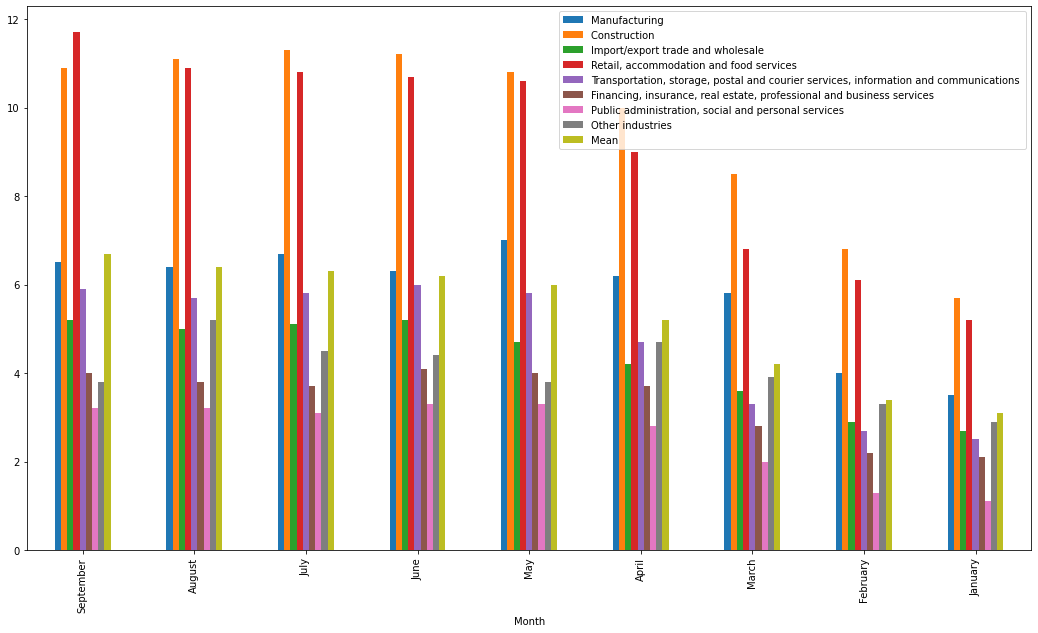

In [33]:
#Unemployment Rate 2020: PEAK MONTH

bar2 = unemp2020_df.sort_values('Mean', ascending = False).plot.bar(x='Month', figsize=(18,10))

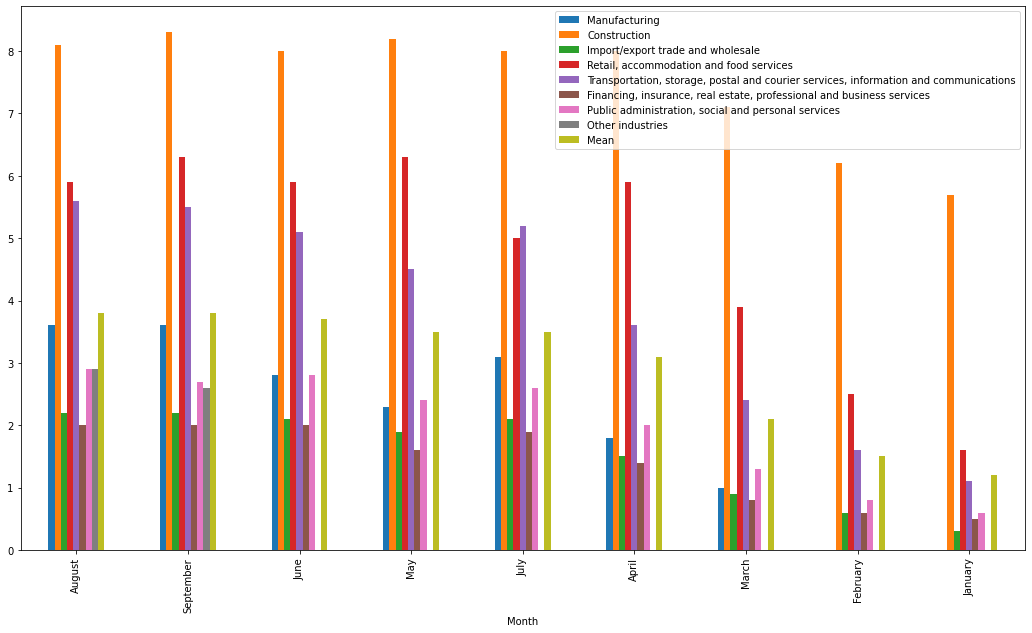

In [34]:
#Underemployment Rate 2020: PEAK MONTH

bar2 = under2020_df.sort_values('Mean', ascending = False).plot.bar(x='Month', figsize=(18,10))

<a id="4.2"></a> <br>
#### Q2: What is the highly affected industry by Covid 19? 

#### Unemployment Data

In [35]:
#Transform the data using transpose

unemp2020_df_T = unemp2020_df.T 

In [36]:
#changing column names for 2020

unemp2020_df_T.columns = unemp2020_df_T.iloc[10]
unemp2020_df_T.drop(unemp2020_df_T.index[10], inplace = True)

In [37]:
unemp2020_df_T.drop(unemp2020_df_T.index[0], inplace = True)

In [38]:
# compute for mean per industry 

unemp2020_df_T['Mean'] = unemp2020_df_T.mean(axis=1)

In [39]:
unemp2020_df_T

Month,January,February,March,April,May,June,July,August,September,Mean
Manufacturing,3.5,4,5.8,6.2,7,6.3,6.7,6.4,6.5,5.822222
Construction,5.7,6.8,8.5,10,10.8,11.2,11.3,11.1,10.9,9.588889
Import/export trade and wholesale,2.7,2.9,3.6,4.2,4.7,5.2,5.1,5,5.2,4.288889
"Retail, accommodation and food services",5.2,6.1,6.8,9,10.6,10.7,10.8,10.9,11.7,9.088889
"Transportation, storage, postal and courier services, information and communications",2.5,2.7,3.3,4.7,5.8,6,5.8,5.7,5.9,4.711111
"Financing, insurance, real estate, professional and business services",2.1,2.2,2.8,3.7,4,4.1,3.7,3.8,4,3.377778
"Public administration, social and personal services",1.1,1.3,2,2.8,3.3,3.3,3.1,3.2,3.2,2.588889
Other industries,2.9,3.3,3.9,4.7,3.8,4.4,4.5,5.2,3.8,4.055556
Mean,3.1,3.4,4.2,5.2,6,6.2,6.3,6.4,6.7,5.277778


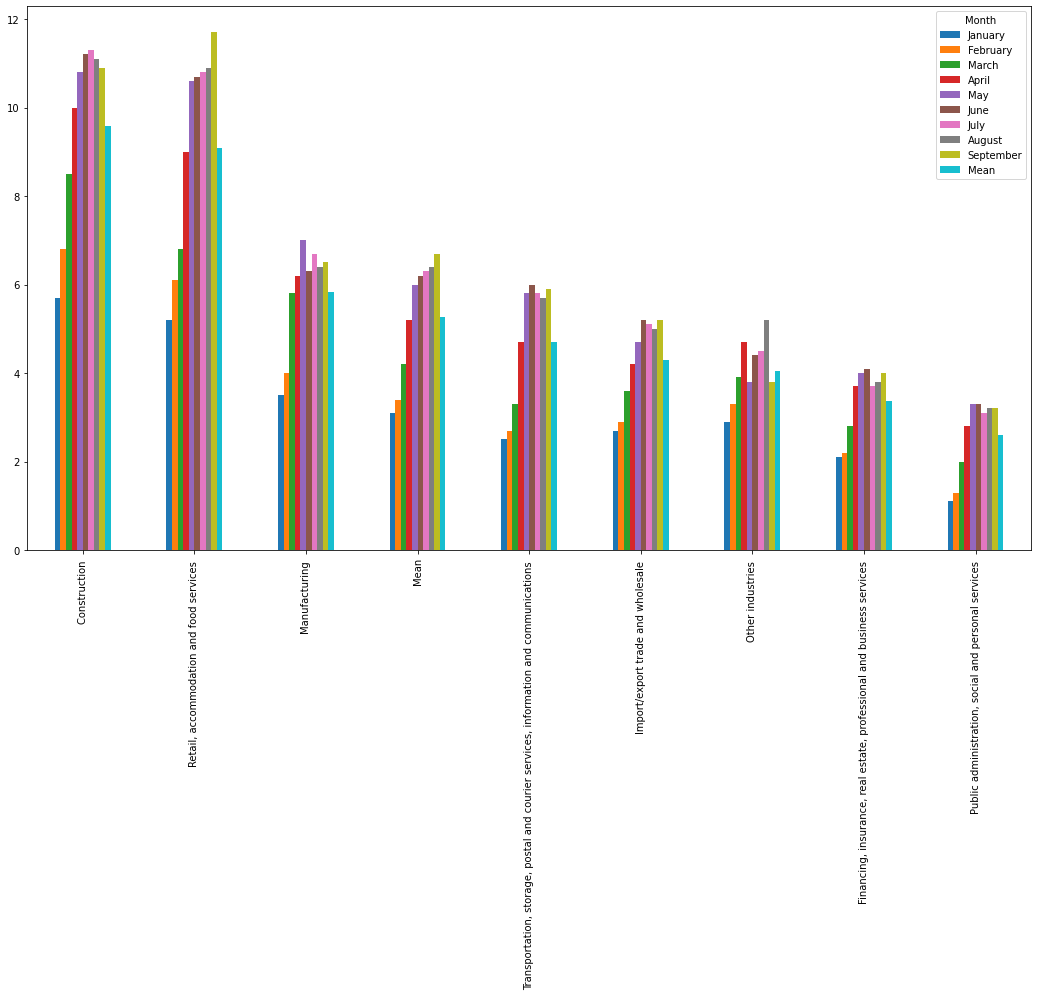

In [40]:
bar2 = unemp2020_df_T.sort_values('Mean', ascending = False).plot.bar(figsize=(18,10))

#### Underemployment Data

In [41]:
#Transform the data using transpose

under2020_df_T = under2020_df.T 

In [42]:
#changing column names for 2020

under2020_df_T.columns = under2020_df_T.iloc[10]
under2020_df_T.drop(under2020_df_T.index[10], inplace = True)

In [43]:
under2020_df_T.drop(under2020_df_T.index[0], inplace = True)

In [44]:
# compute for mean per industry 

under2020_df_T['Mean'] = under2020_df_T.mean(axis=1)

In [45]:
under2020_df_T

Month,January,February,March,April,May,June,July,August,September,Mean
Manufacturing,0,0,1,1.8,2.3,2.8,3.1,3.6,3.6,2.022222
Construction,5.7,6.2,7.1,8,8.2,8,8,8.1,8.3,7.511111
Import/export trade and wholesale,0.3,0.6,0.9,1.5,1.9,2.1,2.1,2.2,2.2,1.533333
"Retail, accommodation and food services",1.6,2.5,3.9,5.9,6.3,5.9,5,5.9,6.3,4.811111
"Transportation, storage, postal and courier services, information and communications",1.1,1.6,2.4,3.6,4.5,5.1,5.2,5.6,5.5,3.844444
"Financing, insurance, real estate, professional and business services",0.5,0.6,0.8,1.4,1.6,2,1.9,2,2,1.422222
"Public administration, social and personal services",0.6,0.8,1.3,2,2.4,2.8,2.6,2.9,2.7,2.011111
Other industries,0,0,0,0,0,0,0,2.9,2.6,0.611111
Mean,1.2,1.5,2.1,3.1,3.5,3.7,3.5,3.8,3.8,2.911111


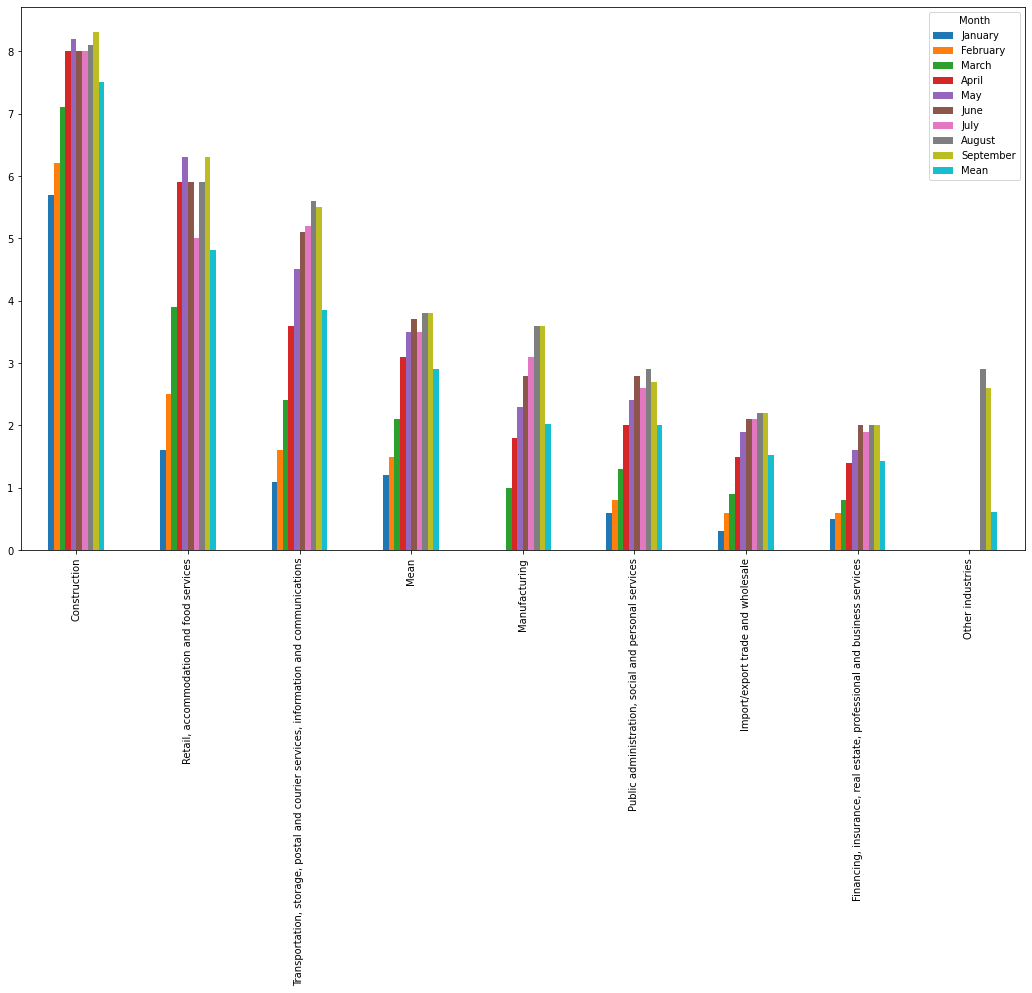

In [46]:
bar2 = under2020_df_T.sort_values('Mean', ascending = False).plot.bar(figsize=(18,10))

<a id="5"></a> <br>
### 5. Employing Clustering Algorithms 
1. K-Means Clustering
2. Agglomerative Clustering

<a id="5.1"></a> <br>
#### 1. K-Means Clustering

In [56]:
# Functions for K-Means

def KMeansElbow (r, data):
    distortions = []
    K = range(1,r)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)
    
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.grid(True)
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [66]:
def KMeansSilhouette (r, data):
    km_scores= []
    km_silhouette = []
    K = range (2,r)
    for k in K:
        km = KMeans(n_clusters=k, random_state=0).fit(data)
        preds = km.predict(data)
        km_scores.append(km.score(data))
        silhouette = silhouette_score(data, preds)
        km_silhouette.append(silhouette)
    
    plt.figure(figsize=(16,8))
    plt.plot(K, km_silhouette, 'bx-')
    plt.grid(True)
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('The Silhouette Method showing the optimal k')
    plt.show()

In [49]:
def KMeansModel (n, data):
    kmeanModel = KMeans(n_clusters=n)
    kmeanModel.fit(data)
    data['k_means']=kmeanModel.predict(data)

In [50]:
def KMeansCluster (data, cond, column):
    cluster = pd.DataFrame(data[data['k_means'] == cond ] [column])
    return cluster

In [109]:
from sklearn.decomposition import PCA
import pylab as pl

def KMeansScatterPlot (data, ctitle):
    PCA_ = PCA(n_components = 2).fit(data)
    PCA_2 = PCA_.transform(data)
    pl.rcParams['figure.figsize'] = (8.0, 8.0)
    for i in range(0, PCA_2.shape[0]):
        if data.k_means[i] == 0:
            CLUSTER_01 = pl.scatter(PCA_2[i,0], PCA_2[i,1], c ='r', marker = 'o', s = 120)
        
        elif data.k_means[i] == 1:
            CLUSTER_02 = pl.scatter(PCA_2[i,0], PCA_2[i,1], c ='g', marker = 'o', s = 120)

        elif data.k_means[i] == 2:
            CLUSTER_03 = pl.scatter(PCA_2[i,0], PCA_2[i,1], c ='b', marker = 'o', s = 120)

    pl.legend([CLUSTER_01, CLUSTER_02, CLUSTER_03],
                  ['Cluster 01', 'Cluster 02', 'Cluster 03'])
    pl.title(ctitle)
        
    pl.show()

#### Clustering Unemployment Data 2020

In [51]:
unemp2020_df_T.shape

(9, 10)

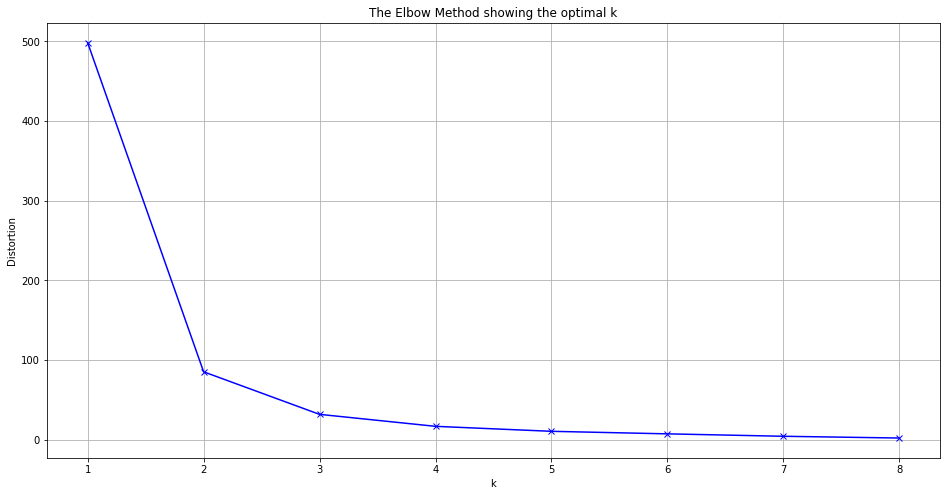

In [57]:
KMeansElbow (9, unemp2020_df_T)

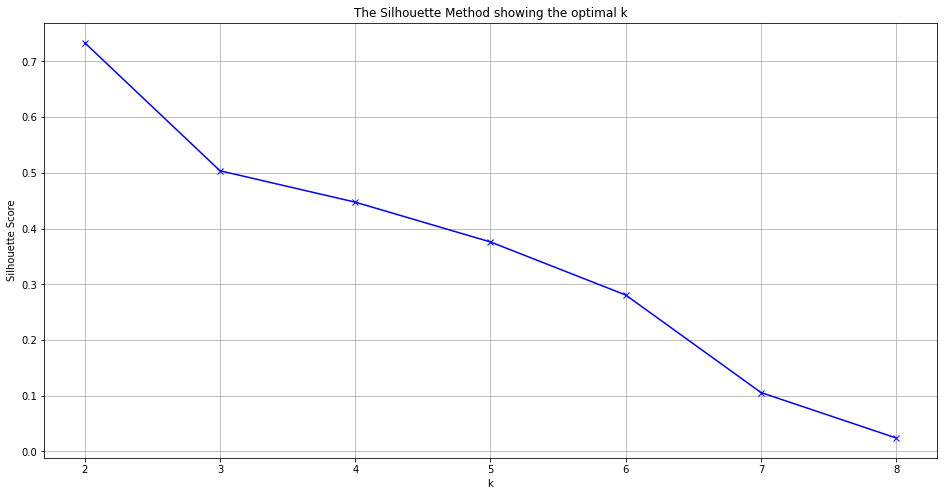

In [67]:
KMeansSilhouette (9, unemp2020_df_T)

In [101]:
KMeansModel(3, unemp2020_df_T)

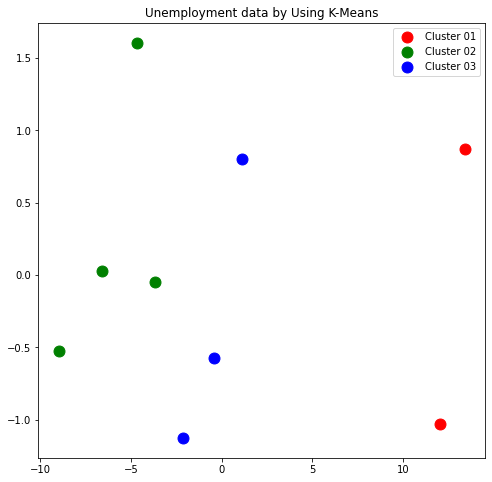

In [110]:
KMeansScatterPlot (unemp2020_df_T, "Unemployment data by Using K-Means")

In [57]:
KMeansCluster (unemp2020_df_T, 0, 'Mean')

,Mean
Manufacturing,5.822222
"Transportation, storage, postal and courier services, information and communications",4.711111
Mean,5.277778


In [58]:
KMeansCluster (unemp2020_df_T, 1, 'Mean')

,Mean
Construction,9.588889
"Retail, accommodation and food services",9.088889


In [59]:
KMeansCluster (unemp2020_df_T, 2, 'Mean')

,Mean
Import/export trade and wholesale,4.288889
"Financing, insurance, real estate, professional and business services",3.377778
"Public administration, social and personal services",2.588889
Other industries,4.055556


#### Clustering Underemployment 2020

In [60]:
under2020_df_T.shape

(9, 10)

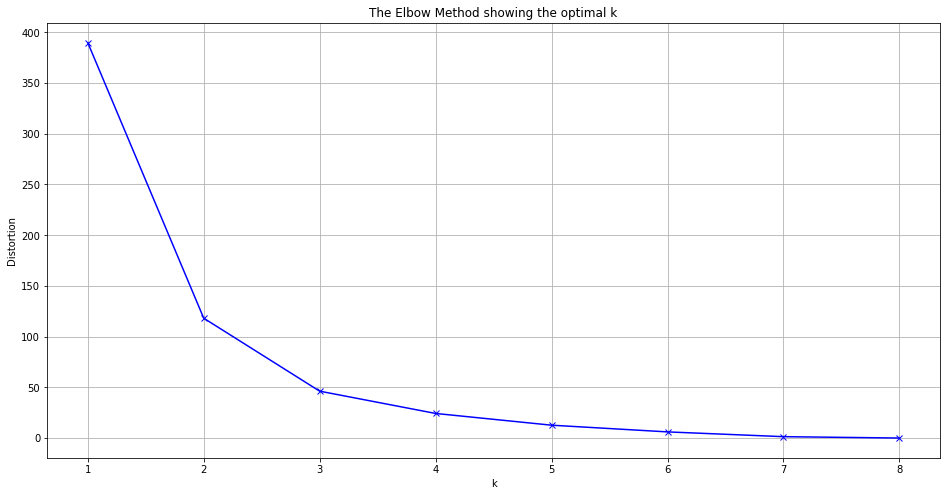

In [86]:
KMeansElbow (9, under2020_df_T)

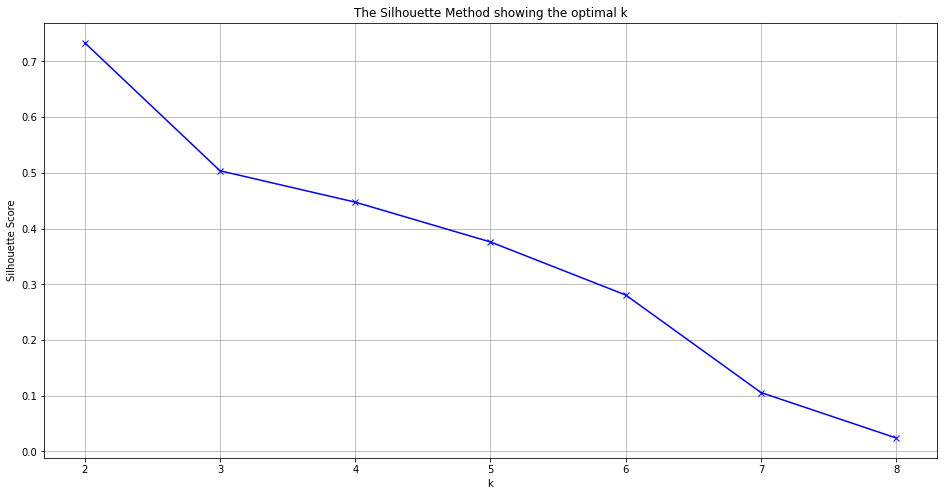

In [87]:
KMeansSilhouette (9, unemp2020_df_T)

In [105]:
KMeansModel(3, under2020_df_T)

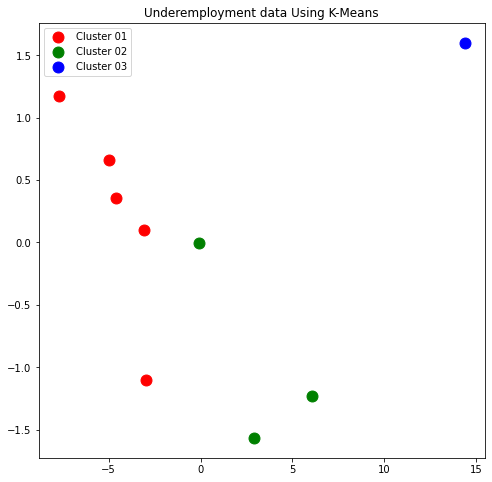

In [107]:
KMeansScatterPlot (under2020_df_T, "Underemployment data Using K-Means")

In [63]:
KMeansCluster (under2020_df_T, 1, 'Mean')

,Mean
Manufacturing,2.022222
Import/export trade and wholesale,1.533333
"Financing, insurance, real estate, professional and business services",1.422222
"Public administration, social and personal services",2.011111
Other industries,0.611111


In [64]:
KMeansCluster (under2020_df_T, 2, 'Mean')

,Mean
"Retail, accommodation and food services",4.811111
"Transportation, storage, postal and courier services, information and communications",3.844444
Mean,2.911111


<a id="5.2"></a> <br>
#### 2. Agglomerative Clustering 

In [83]:
# functions of Hierarchical Clustering

def AggloDendogram (data):
    from scipy.cluster import hierarchy
    Z = hierarchy.linkage(data, 'complete')
    plt.figure()
    plt.title('Hierarchical Clustering showing possible number of clusters')
    dn = hierarchy.dendrogram(Z)
    plt.show()

In [65]:
def Agglomerative(data, n): 
    scaler = StandardScaler()
    X = scaler.fit_transform(data)
    model = AgglomerativeClustering(n_clusters=n, affinity = 'euclidean', linkage = 'ward')
    labels = model.fit_predict(X)
    return (labels)

In [66]:
def AggloLabels(data, agglolabel):
    data.insert((data.shape[1]),'agglomerative',agglolabel)

In [67]:
def AggloCluster (data, cond, column):
    cluster = pd.DataFrame(data[data['agglomerative'] == cond ] [column])
    return cluster

##### Clustering Unemployment  2020

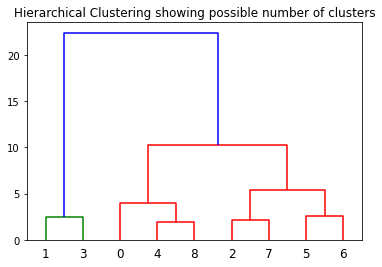

In [84]:
AggloDendogram (unemp2020_df_T)

In [68]:
agglolabels = Agglomerative(unemp2020_df_T, 3)

In [69]:
AggloLabels(unemp2020_df_T, agglolabels)

In [70]:
unemp2020_df_T.head()

Month,January,February,March,April,May,June,July,August,September,Mean,k_means,agglomerative
Manufacturing,3.5,4,5.8,6.2,7,6.3,6.7,6.4,6.5,5.822222,0,2
Construction,5.7,6.8,8.5,10,10.8,11.2,11.3,11.1,10.9,9.588889,1,1
Import/export trade and wholesale,2.7,2.9,3.6,4.2,4.7,5.2,5.1,5,5.2,4.288889,2,0
"Retail, accommodation and food services",5.2,6.1,6.8,9,10.6,10.7,10.8,10.9,11.7,9.088889,1,1
"Transportation, storage, postal and courier services, information and communications",2.5,2.7,3.3,4.7,5.8,6,5.8,5.7,5.9,4.711111,0,2


In [71]:
AggloCluster (unemp2020_df_T, 0, 'Mean')

,Mean
Import/export trade and wholesale,4.288889
"Financing, insurance, real estate, professional and business services",3.377778
"Public administration, social and personal services",2.588889
Other industries,4.055556


In [72]:
AggloCluster (unemp2020_df_T, 1, 'Mean')

,Mean
Construction,9.588889
"Retail, accommodation and food services",9.088889


In [73]:
AggloCluster (unemp2020_df_T, 2, 'Mean')

,Mean
Manufacturing,5.822222
"Transportation, storage, postal and courier services, information and communications",4.711111
Mean,5.277778


##### Clustering Underemployment Data 2020

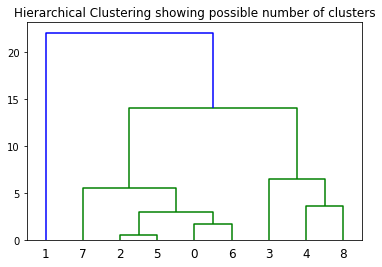

In [85]:
AggloDendogram (under2020_df_T)

In [76]:
agglolabels = Agglomerative(under2020_df_T, 3)

In [77]:
AggloLabels(under2020_df_T, agglolabels)

In [78]:
under2020_df_T.head()

Month,January,February,March,April,May,June,July,August,September,Mean,k_means,agglomerative
Manufacturing,0,0,1,1.8,2.3,2.8,3.1,3.6,3.6,2.022222,1,2
Construction,5.7,6.2,7.1,8,8.2,8,8,8.1,8.3,7.511111,0,1
Import/export trade and wholesale,0.3,0.6,0.9,1.5,1.9,2.1,2.1,2.2,2.2,1.533333,1,2
"Retail, accommodation and food services",1.6,2.5,3.9,5.9,6.3,5.9,5,5.9,6.3,4.811111,2,0
"Transportation, storage, postal and courier services, information and communications",1.1,1.6,2.4,3.6,4.5,5.1,5.2,5.6,5.5,3.844444,2,0


In [80]:
AggloCluster (under2020_df_T, 0, 'Mean')

,Mean
"Retail, accommodation and food services",4.811111
"Transportation, storage, postal and courier services, information and communications",3.844444
Mean,2.911111


In [81]:
AggloCluster (under2020_df_T, 1, 'Mean')

,Mean
Construction,7.511111


In [82]:
AggloCluster (under2020_df_T, 2, 'Mean')

,Mean
Manufacturing,2.022222
Import/export trade and wholesale,1.533333
"Financing, insurance, real estate, professional and business services",1.422222
"Public administration, social and personal services",2.011111
Other industries,0.611111


<a id="6"></a> <br>
### 6. Findings 

Based on the results of the analysis, the highly affected industry groups are the following: 
1.	On Unemployment data set: Construction and Retail, accommodation and food services
2.	On Underemployment data set: Construction
3.	On both Unemployment and Underemployment data sets: Construction 

While, the least affected industry groups are the following: 
1.	On Unemployment data set: Public administration, social and personal services; and Financing, insurance, real estate, and professional and business services.
2.	On Underemployment data set: Financing, insurance, real estate, and professional and business services; and Import/export trade and wholesale
3.	On both Unemployment and Underemployment data sets:  Financing, insurance, real estate, and professional and business services.
